### Stage 1:
Perform statistical parsing/tagging on a document in JSON format

INPUTS: JSON doc for the text input  
OUTPUT: JSON format `ParsedGraf(id, sha1, graf)`

In [1]:
import pytextrank
import sys

path_stage0 = "dat/mih.json"
path_stage1 = "o1.json"

with open(path_stage1, 'w') as f:
    for graf in pytextrank.parse_doc(pytextrank.json_iter(path_stage0), force_encode=False):
        f.write("%s\n" % pytextrank.pretty_print(graf._asdict()))
        # to view output in this notebook
        print(pytextrank.pretty_print(graf))

["777", "7b982e54fa330a6854a0ed5397d49223fdc70645", [[1, "Compatibility", "compatibility", "NNP", 1, 0], [0, "of", "of", "IN", 0, 1], [2, "systems", "system", "NNS", 1, 2], [0, "of", "of", "IN", 0, 3], [3, "linear", "linear", "JJ", 1, 4], [4, "constraints", "constraint", "NNS", 1, 5], [0, "over", "over", "IN", 0, 6], [0, "the", "the", "DT", 0, 7], [5, "set", "set", "NN", 1, 8], [0, "of", "of", "IN", 0, 9], [6, "natural", "natural", "JJ", 1, 10], [7, "numbers", "number", "NNS", 1, 11], [0, ".", ".", ".", 0, 12]]]
["777", "c4c7e26543795f0f993e4504dc49a256daf53a9a", [[8, "Criteria", "criterium", "NNS", 1, 13], [0, "of", "of", "IN", 0, 14], [1, "compatibility", "compatibility", "NN", 1, 15], [0, "of", "of", "IN", 0, 16], [0, "a", "a", "DT", 0, 17], [2, "system", "system", "NN", 1, 18], [0, "of", "of", "IN", 0, 19], [3, "linear", "linear", "JJ", 1, 20], [9, "Diophantine", "diophantine", "NNP", 1, 21], [10, "equations", "equation", "NNS", 1, 22], [0, ",", ",", ".", 0, 23], [11, "strict", "st

### Stage 2:
Collect and normalize the key phrases from a parsed document

INPUTS: `<stage1>`  
OUTPUT: JSON format `RankedLexeme(text, rank, ids, pos)`

In [2]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"

graph, ranks = pytextrank.text_rank(path_stage1)
pytextrank.render_ranks(graph, ranks)

with open(path_stage2, 'w') as f:
    for rl in pytextrank.normalize_key_phrases(path_stage1, ranks):
        f.write("%s\n" % pytextrank.pretty_print(rl._asdict()))
        # to view output in this notebook
        print(pytextrank.pretty_print(rl))

["types systems", 0.13486305894035935, [24, 2], "np", 1]
["minimal supporting set", 0.07460380088205383, [19, 28, 5], "np", 1]
["systems", 0.06743152947017968, [2], "nns", 5]
["strict inequations", 0.05731177173245888, [11, 12], "np", 1]
["considered", 0.04976154508195356, [15], "vbn", 2]
["types", 0.04835761103542739, [24], "nns", 3]
["mixed types", 0.04835761103542739, [31, 24], "np", 1]
["natural numbers", 0.03866836213644179, [6, 7], "np", 1]
["set", 0.037301900441026915, [5], "nn", 4]
["minimal set", 0.037301900441026915, [19, 5], "np", 1]
["solutions", 0.036824217304709826, [20], "nns", 3]
["linear constraints", 0.03369276807447797, [3, 4], "np", 1]
["linear diophantine equations", 0.030727987835205937, [3, 9, 10], "np", 1]
["solving", 0.030041781380921145, [30], "vbg", 1]
["corresponding algorithms", 0.028846817654395514, [26, 21], "np", 1]
["nonstrict inequations", 0.02865588586622944, [13, 12], "np", 1]
["inequations", 0.02865588586622944, [12], "nns", 2]
["numbers", 0.0193341

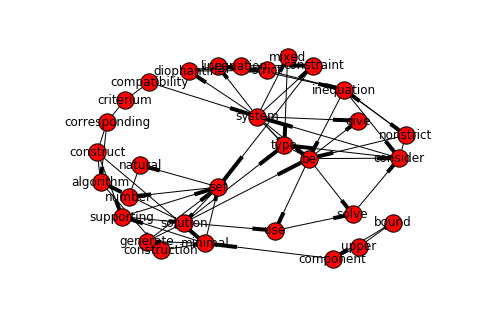

In [3]:
import networkx as nx
import pylab as plt

nx.draw(graph, with_labels=True) 
plt.show() 

### Stage 3:
Calculate a significance weight for each sentence, using MinHash to approximate a Jaccard distance from key phrases determined by TextRank

INPUTS: `<stage1> <stage2>`  
OUTPUT: JSON format `SummarySent(dist, idx, text)`

In [4]:
path_stage1 = "o1.json"
path_stage2 = "o2.json"

kernel = pytextrank.rank_kernel(path_stage2, force_encode=False)

for s in pytextrank.top_sentences(kernel, path_stage1, force_encode=False):
    print(pytextrank.pretty_print(s._asdict()))

{"dist": 0.06403227880013135, "idx": 3, "text": "These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types ."}
{"dist": 0.06307326951547915, "idx": 0, "text": "Compatibility of systems of linear constraints over the set of natural numbers ."}
{"dist": 0.0596608565236893, "idx": 2, "text": "Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given ."}
{"dist": 0.04553033652913545, "idx": 1, "text": "Criteria of compatibility of a system of linear Diophantine equations , strict inequations , and nonstrict inequations are considered ."}


### Stage 4:
Summarize a document based on most significant sentences and key phrases

INPUTS: `<stage2> <stage3>`  
OUTPUT: Markdown format

In [5]:
path_stage2 = "o2.json"
path_stage3 = "o3.json"

phrases = ", ".join([p for p in pytextrank.limit_keyphrases(path_stage2, phrase_limit=12)])
sent_iter = sorted(pytextrank.limit_sentences(path_stage3, word_limit=150), key=lambda x: x[1])
s = []

for sent_text, idx in sent_iter:
    s.append((pytextrank.make_sentence([w for w in sent_text])))

graf_text = " ".join(s)
print("**excerpts:** %s\n\n**keywords:** %s" % (graf_text, phrases,))

**excerpts:** Compatibility of systems of linear constraints over the set of natural numbers. Criteria of compatibility of a system of linear Diophantine equations, strict inequations, and nonstrict inequations are considered. Upper bounds for components of a minimal set of solutions and algorithms of construction of minimal generating sets of solutions for all types of systems are given. These criteria and the corresponding algorithms for constructing a minimal supporting set of solutions can be used in solving all the considered types systems and systems of mixed types.

**keywords:** types systems, minimal supporting set, systems, strict inequations, types, mixed types, natural numbers, set, minimal set, solutions, linear constraints, linear diophantine equations
